In [106]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

### Define the neural network model


Using the Keras Sequential API we define a model with three fully connected layers. 
- The first layer has an input with size of $[\texttt{batch_size}, \texttt{d0}, \texttt{d1}]$. However, in the input shape argument we only need to specify $[\texttt{d0}, \texttt{d1}]$, if the input does not have a second dimension $\texttt{d1}$ then in the input shape argument we can write $(\texttt{d0}, )$.
- The first layer also has an activation function, which we can specify using the activation argument, common choices are ReLU, sigmoid, tanh and linear. 
- By simply adding another Dense object layer to the Sequential model we can build the second layer.

<img src="https://miro.medium.com/max/1400/1*ZB6H4HuF58VcMOWbdpcRxQ.png" alt="NN_Image" width="400">

In [107]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(128, activation='relu'),
    Dense(1, activation='linear')
])

In [108]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_28 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 129       
Total params: 8,577
Trainable params: 8,577
Non-trainable params: 0
_________________________________________________________________


In [109]:
model.compile(
    optimizer='adam', # 'rmsprop', 'sgd'
    loss='mean_squared_error', # 'mae'
    metrics='mse'
)

### Generate random data

In this example we will try to fit the curve
$$f(x) = x\cos(x) + \sin^2(x)$$

In [110]:
X_train = tf.random.uniform(shape=[1000, ], minval=0, maxval=10)
Y_train = X_train * tf.cos(X_train) + tf.sin(X_train) ** 2 + 0.5*tf.random.normal(shape=[1000, ])

X_test = tf.random.uniform(shape=[500, ], minval=0, maxval=10)
Y_test = X_test * tf.cos(X_test) + tf.sin(X_test) ** 2 + 0.5*tf.random.normal(shape=[500, ])

Now we can visualize the data, note that since the data is not sorted we should use a scatter plot.

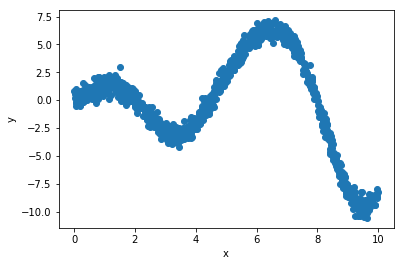

In [111]:
plt.figure()
plt.scatter(X_train.numpy(), Y_train.numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Training

Using the generated data we can train the neural network model, we train it for 500 epochs (one epoch is one pass over the entire dataset) with a batch size of 64.

In [112]:
# training_history = model.fit(features, labels, epochs=epochs, batch_size=batch_size)
history = model.fit(X_train, Y_train, epochs=500, batch_size=32)

Epoch 1/500
32/32 [==============================] - 0s 1ms/step - loss: 18.9725 - mse: 18.9725
Epoch 2/500
32/32 [==============================] - 0s 1ms/step - loss: 18.7291 - mse: 18.7291
Epoch 3/500
32/32 [==============================] - 0s 958us/step - loss: 18.5828 - mse: 18.5828
Epoch 4/500
32/32 [==============================] - 0s 928us/step - loss: 18.5460 - mse: 18.5460
Epoch 5/500
32/32 [==============================] - 0s 1ms/step - loss: 18.3716 - mse: 18.3716
Epoch 6/500
32/32 [==============================] - 0s 988us/step - loss: 18.2816 - mse: 18.2816
Epoch 7/500
32/32 [==============================] - 0s 989us/step - loss: 18.1577 - mse: 18.1577
Epoch 8/500
32/32 [==============================] - 0s 905us/step - loss: 18.2197 - mse: 18.2197
Epoch 9/500
32/32 [==============================] - 0s 906us/step - loss: 18.0335 - mse: 18.0335
Epoch 10/500
32/32 [==============================] - 0s 850us/step - loss: 17.7463 - mse: 17.7463
Epoch 11/500
32/32 [=====

32/32 [==============================] - 0s 927us/step - loss: 0.7508 - mse: 0.7508
Epoch 170/500
32/32 [==============================] - 0s 1ms/step - loss: 0.7664 - mse: 0.7664
Epoch 171/500
32/32 [==============================] - 0s 806us/step - loss: 0.7164 - mse: 0.7164
Epoch 172/500
32/32 [==============================] - 0s 788us/step - loss: 0.6696 - mse: 0.6696
Epoch 173/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6578 - mse: 0.6578
Epoch 174/500
32/32 [==============================] - 0s 859us/step - loss: 0.8010 - mse: 0.8010
Epoch 175/500
32/32 [==============================] - 0s 747us/step - loss: 0.7632 - mse: 0.7632
Epoch 176/500
32/32 [==============================] - 0s 717us/step - loss: 0.6844 - mse: 0.6844
Epoch 177/500
32/32 [==============================] - 0s 781us/step - loss: 0.7067 - mse: 0.7067
Epoch 178/500
32/32 [==============================] - 0s 799us/step - loss: 0.7398 - mse: 0.7398
Epoch 179/500
32/32 [=================

32/32 [==============================] - 0s 728us/step - loss: 0.4484 - mse: 0.4484
Epoch 336/500
32/32 [==============================] - 0s 785us/step - loss: 0.4124 - mse: 0.4124
Epoch 337/500
32/32 [==============================] - 0s 703us/step - loss: 0.4878 - mse: 0.4878
Epoch 338/500
32/32 [==============================] - 0s 729us/step - loss: 0.4053 - mse: 0.4053
Epoch 339/500
32/32 [==============================] - 0s 747us/step - loss: 0.3968 - mse: 0.3968
Epoch 340/500
32/32 [==============================] - 0s 691us/step - loss: 0.3680 - mse: 0.3680
Epoch 341/500
32/32 [==============================] - 0s 709us/step - loss: 0.3677 - mse: 0.3677
Epoch 342/500
32/32 [==============================] - 0s 706us/step - loss: 0.3640 - mse: 0.3640
Epoch 343/500
32/32 [==============================] - 0s 786us/step - loss: 0.3594 - mse: 0.3594
Epoch 344/500
32/32 [==============================] - 0s 768us/step - loss: 0.4373 - mse: 0.4373
Epoch 345/500
32/32 [=============

### Evaluate the performance of the model

Using the `model.predict()` method we can evaluate the performance of our model on the testing dataset and compare it with the corresponding ground truth data.

In [113]:
# prediction = model.predict(features)
y_hat = model.predict(X_test)

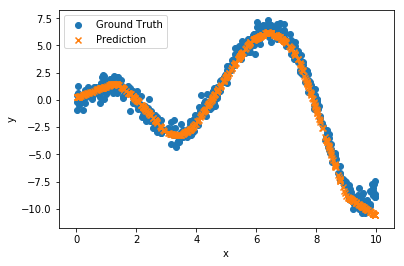

In [114]:
plt.figure()
plt.scatter(X_test.numpy(), Y_test.numpy(), label='Ground Truth')
plt.scatter(X_test.numpy(), y_hat, marker='x', label='Prediction')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [115]:
loss_history = history.history['loss']

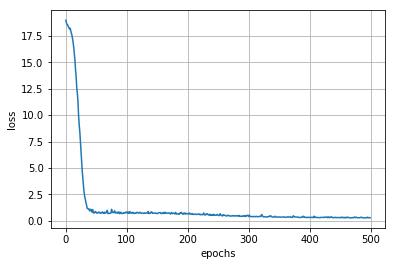

In [117]:
plt.figure()
plt.plot(loss_history)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

### Summary

We can see that using Keras' Sequential API we can build a functional neural network using very few lines of code.
```
model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(128, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics='mse'
)

history = model.fit(X_train, Y_train, epochs=500, batch_size=32)
```